In [1]:
from nltk.corpus import stopwords
from collections import Counter
from gensim.test.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Preparazione dei dati

In [2]:
def get_text_from_file(path):
    file = []
    stop_words = set(stopwords.words('english'))
    with open (path, 'r') as f:
        for row in f:
            filtered_s = [w for w in word_tokenize(row) if not w.lower() in stop_words]
            file.append(simple_preprocess(str(filtered_s), deacc=True))
    f.close()
    return file


def load_file(file_path):
    file = get_text_from_file(file_path)
    c = Counter()
    num_lines = sum(1 for line in open(file_path)) # Number of lines in the file

    for row in file:
        c.update(row)
        
    return num_lines, file, c
    

### Classe importata manualmente

In [3]:
# Class available from https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html
import numpy as np

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):

        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):

        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

### Algoritmo

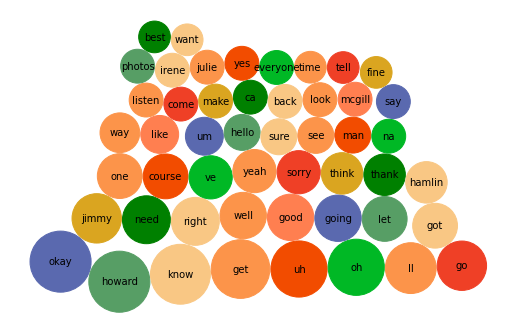

In [5]:
file_data = load_file('../data/bcs_s6e7_script.txt') # Load the file and get the number of lines and the list of most common word in the file

words = file_data[2].most_common(50)

word = []
for i in range(len(words)):
    word.append(words[i][0])
        
freq = []
for i in range(len(words)):
    freq.append(words[i][1])

data = {
    'bigrams': word,

    'frequency': freq,

    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral', '#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral']
}

bubble_chart = BubbleChart(area=data['frequency'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, data['bigrams'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()